# Session 1 : Gradient Boosting for Regression

## Boosting : 

Boosting is a general ensemble method in machine learning that aims to create a strong
classifier or regressor by combining the predictions of several weaker models. The idea is to
build the strong model incrementally, by sequentially adding weak models that are trained to
correct the mistakes made by the existing ensemble.

- In Boosting we train different models __(models with high bias)__ on same data.


- We take __High Bias Low Variance model.__ eg : Linear Model, shallow Trees 


- __In the end we get a Low Bias Low Variance Model__


> __High Bias means results are not good on training data.__

## Difference between bagging and boosting : 

### Boosting

**Concept**:
- Boosting sequentially builds weak models, where each new model __focuses on correcting the errors made by the previous models.__


- Gradually by passing through many models the High Bias gets reduced.


- The final output is a weighted combination of the predictions from all models.


- We get Low Bias Low Variance model

**Process**:
1. **Initial Model**: Train the first model on the original dataset.
2. **Error Calculation**: Evaluate the errors made by the first model.
3. **Subsequent Models**: Train subsequent models to focus on the examples that were previously misclassified or had higher errors.
4. **Weighted Combination**: Combine the predictions of all models with weights proportional to their accuracy.

**Characteristics**:
- **Reduces Bias**: By focusing on errors, boosting reduces bias and improves model accuracy.
- **Sequential Dependency**: Each model depends on the results of the previous models, making boosting inherently sequential.
- **Potential Overfitting**: Boosting can lead to overfitting, especially with noisy data, though techniques like regularization and early stopping can mitigate this.

**Example**:
- AdaBoost: Adjusts the weights of incorrectly classified examples so that subsequent models focus more on them.
- Gradient Boosting: Uses gradient descent to minimize the error of the ensemble by adding models that correct the residuals of the previous models.

### Bagging (Bootstrap Aggregating)

**Concept**:

- __Same Base Model :__ In bagging, __multiple instances of the same learning algorithm (e.g., decision trees)__ are used as base models. Each model is trained independently. 


- Bagging creates multiple independent models from different subsets of the training data, generated through bootstrapping (random sampling with replacement).


- The final output is obtained by averaging the predictions (regression) or taking a majority vote (classification).


**Process**:
1. **Data Sampling**: Randomly sample subsets of the training data with replacement to create multiple bootstrapped datasets.


2. **Model Training**: Train a separate model on each bootstrapped dataset.


3. **Aggregation**: Aggregate the predictions of all models to produce the final prediction.


**Characteristics**:

- **Reduces Variance**: By averaging multiple models, bagging reduces variance and helps prevent overfitting.

- **Independent Models**: Each model is trained independently of others.

- **Parallel Training**: Models can be trained in parallel, making bagging computationally efficient.

**Example**:
- Random Forests: An ensemble of decision trees where each tree is trained on a different bootstrapped subset of the data.

### Key Differences

1. **Model Independence**:
   
   - **Bagging**: Models are trained independently.
   
   - **Boosting**: Models are trained sequentially, each depending on the performance of the previous one.


2. **Error Focus**:
   
   - **Bagging**: Reduces variance by averaging predictions from multiple models.
   
   - **Boosting**: Reduces bias by focusing on correcting errors from previous models.


3. **Training Process**:
   
   - **Bagging**: Allows for parallel training of models.
   
   - **Boosting**: Requires sequential training, making it more computationally intensive.


4. **Risk of Overfitting**:
   
   - **Bagging**: Generally less prone to overfitting due to averaging.
   
   - **Boosting**: More prone to overfitting, especially with noisy data, but this can be controlled with techniques like regularization.

### Conclusion

- Both bagging and boosting are powerful ensemble techniques that improve the performance of machine learning models. 


- Bagging is more focused on reducing variance by creating independent models and averaging their predictions, while boosting is focused on reducing bias by sequentially improving the models based on their performance on errors.



### Characteristics of High Bias

- __Underfitting :__ The model is too simple to capture the underlying patterns in the data. It performs poorly on both training and testing data.


- eg : Linear Model on Non-linear Data, Shallow Decision Tree


- __High Training Error :__ Since the model fails to capture the complexity of the data, it makes significant errors even on the training set.



- __Low Variance :__ The model's predictions do not change much with different training data. This means it is consistent but consistently wrong.

## Gradient Boosting

https://colab.research.google.com/drive/1GSeBSO22uMbCvlN10x0mxtBbx9Ap2nqM?usp=sharing#scrollTo=_gTJ1Gic_mFv


https://colab.research.google.com/github/campusx-official/100-days-of-machine-learning/blob/main/gradient-boosting/gradient_boost_step_by_step.ipynb


https://drive.google.com/file/d/1-MO6IasyTlk2jWX61SPuQ_4I1MsLJ0-a/view

- Gradient Boosting is a machine learning ensemble technique that aims to build a strong
predictive model by combining the predictions of __several weaker models__ using the concept of
Additive Modelling, typically decision trees. 


- The method works by iteratively adding models to
the ensemble, with each new model trained to correct the mistakes made by the combined
ensemble of existing models.


- Gradient Boosting is a powerful and flexible method that can be used for both regression and
classification tasks.


- It is particularly effective when the data has complex, non-linear relationships, and it often
performs well even with little hyperparameter tuning.




- Its popularity in real-world applications and machine learning competitions is testament to its
effectiveness, and it has implementations in most major machine learning libraries, such as
scikit-learn, XGBoost, LightGBM, and CatBoost.

### NOTE : Gradient Boosting works on Additive Modelling i.e one function is sum of many smaller functions

## Maths behind Gradient Boosting Regression : 

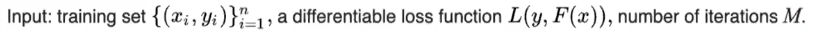

$$\text{Loss function L(y, F(x)) here will be}\longrightarrow\;\frac{1}{2} * \sum_{i=1}^n (y - \hat y)^2$$

In [1]:
import pandas as pd
import numpy as np

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.DataFrame([[165,137,472,192],[101,92,250,144],[29,127,201,91]],columns=['R&D','Ops','Marketing','Profit'])

In [3]:
df

R&D  Ops  Marketing  Profit
0  165  137        472     192
1  101   92        250     144
2   29  127        201      91

### Step 1 : find $f_o(x)$ for value of $\gamma$ (average of output column)

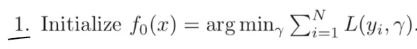

#### Loss function used here $$Loss\;(L) = \text{argmin}_\gamma \;\frac{1}{2}\;\sum_{i=1}^n\;(y-\gamma)^2$$

- __we will find the value of Gamma $(\gamma)$, where Loss is minimum__

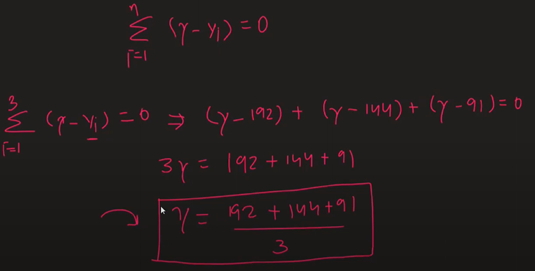

-  __After calculation, $\gamma = $ mean of output column for any dataset because we choosed squared loss as Loss__


$$\text{So, } \gamma = f_o(x) = \text{mean of output column} = y_{mean}$$

In [4]:
df['f0(x)'] = df['Profit'].mean()
df

R&D  Ops  Marketing  Profit       f0(x)
0  165  137        472     192  142.333333
1  101   92        250     144  142.333333
2   29  127        201      91  142.333333

### Step 2a : Calculate $r_{im}$ for each row $\Longrightarrow$ how much error our model is making calculating y

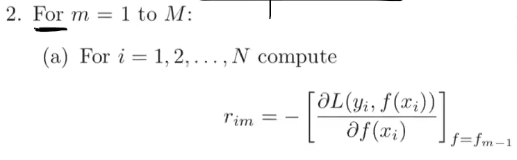

- $f(x_i)$ is output of the model $\rightarrow\;(\hat y_i)$


- we will start caluclating $f_1, f_2, f_3......$ which are decision trees


- i = number of training data rows


- "m" is here is the number of the decion tree on which we currently are.


- $r_{im}$ __is pseudo residual__ which is difference of output column (Profit column) - $f_0(x)$  of each row $\longrightarrow (y - \hat y)$


- we call it pseudo as actual residual is $(y -\hat y)^2$ but here we use $(y - \hat y)\;$ only

In [5]:
df['r1'] = df['Profit'] - df['f0(x)']
df

R&D  Ops  Marketing  Profit       f0(x)         r1
0  165  137        472     192  142.333333  49.666667
1  101   92        250     144  142.333333   1.666667
2   29  127        201      91  142.333333 -51.333333

### Step 2b : Fit a regression tree and how much error our second model is making on predicting r1 (not y)

- All input columns will be input columns for the first decision tree.


- The ouput column here will be r1

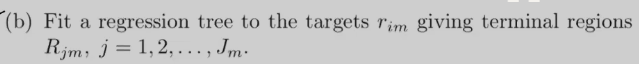

- __Terminal region is the region present by the leaf nodes.__

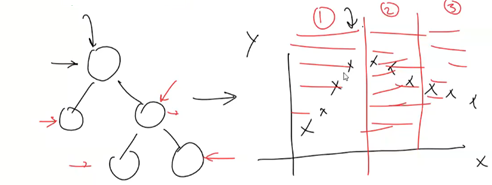

In [8]:
df.head(3)

R&D  Ops  Marketing  Profit       f0(x)         r1
0  165  137        472     192  142.333333  49.666667
1  101   92        250     144  142.333333   1.666667
2   29  127        201      91  142.333333 -51.333333

In [6]:
# input columns
df.iloc[:,0:3]

R&D  Ops  Marketing
0  165  137        472
1  101   92        250
2   29  127        201

In [7]:
# output column (r1)
df.iloc[:,-1]

0    49.666667
1     1.666667
2   -51.333333
Name: r1, dtype: float64

In [9]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(max_depth=2)

reg.fit(df.iloc[:,0:3].values, df.iloc[:,-1]) # y_train here will be r1 column

DecisionTreeRegressor(max_depth=2)

In [10]:
reg.predict(df.iloc[:,0:3].values)

array([ 49.66666667,   1.66666667, -51.33333333])

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


[Text(0.4, 0.8333333333333334, 'x[0] <= 65.0\nsquared_error = 1701.556\nsamples = 3\nvalue = -0.0'),
 Text(0.2, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = -51.333'),
 Text(0.6, 0.5, 'x[0] <= 133.0\nsquared_error = 576.0\nsamples = 2\nvalue = 25.667'),
 Text(0.4, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 1.667'),
 Text(0.8, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 49.667')]

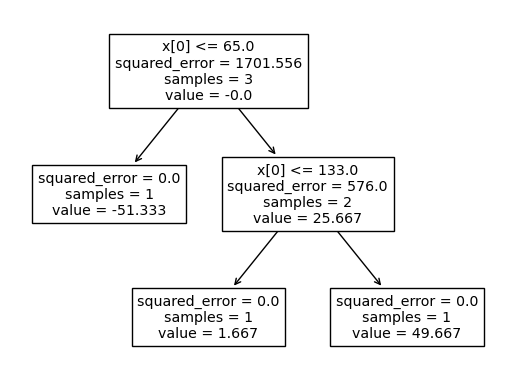

In [11]:
from sklearn.tree import plot_tree
plot_tree(reg)

# 165	137	472


### Step 2c : For each terminal we will only consider the points which have fallen in that terminal

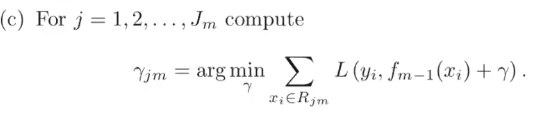

### calculate $\gamma$ for each terminal region:

> __Output of each terminal region will be average of all the points falling in the region (output of each leaf of the decision tree) and $\gamma$ will be same__

### NOTE : We are getting average as the output because we are using Least square as loss function, if we use any other loss function then the output of terminal region and average of all points in that region will not be equal.

### Step 2d :  Output of new point = result of model $(f_o)$ (which was mean) + output from the terminal region where the new point falls.

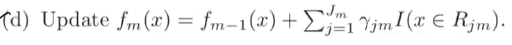

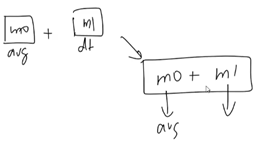

### Step 3

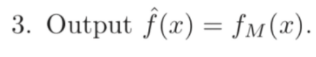

#### So, output from 5th DT model will be :  

$$f_5 (x) = f_0(x) + dt_{1} + dt_{2} + dt_{3} + dt_{4}$$

## Step by Step code for Gradient Boosting Regression: 

#### Training 3 dt models 

- m_o -> mean of the y


- m_1 -> first dt model


- m_2 -> second dt model

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [85]:
df = pd.DataFrame()

In [86]:
df['X'] = X.reshape(100)
df['y'] = y

In [87]:
df

X         y
0  -0.125460  0.051573
1   0.450714  0.594480
2   0.231994  0.166052
3   0.098658 -0.070178
4  -0.343981  0.343986
..       ...       ...
95 -0.006204 -0.040675
96  0.022733 -0.002305
97 -0.072459  0.032809
98 -0.474581  0.689516
99 -0.392109  0.502607

[100 rows x 2 columns]

Text(0.5, 1.0, 'X vs Y')

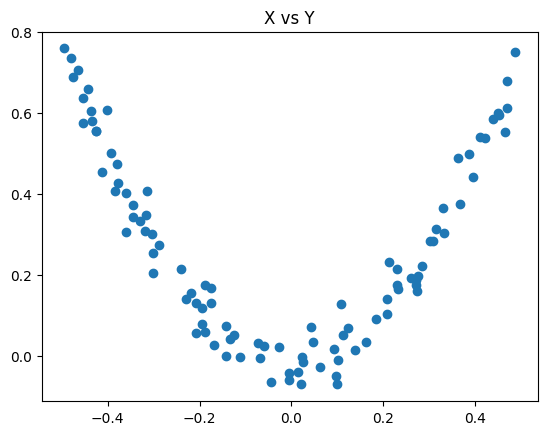

In [88]:
plt.scatter(df['X'],df['y'])
plt.title('X vs Y')

#### m_0 model -> mean of y :

In [89]:
df['pred1_mean'] = df['y'].mean()

In [90]:
df

X         y  pred1_mean
0  -0.125460  0.051573    0.265458
1   0.450714  0.594480    0.265458
2   0.231994  0.166052    0.265458
3   0.098658 -0.070178    0.265458
4  -0.343981  0.343986    0.265458
..       ...       ...         ...
95 -0.006204 -0.040675    0.265458
96  0.022733 -0.002305    0.265458
97 -0.072459  0.032809    0.265458
98 -0.474581  0.689516    0.265458
99 -0.392109  0.502607    0.265458

[100 rows x 3 columns]

In [91]:
df['res1'] = df['y'] - df['pred1_mean']

In [92]:
df

X         y  pred1_mean      res1
0  -0.125460  0.051573    0.265458 -0.213885
1   0.450714  0.594480    0.265458  0.329021
2   0.231994  0.166052    0.265458 -0.099407
3   0.098658 -0.070178    0.265458 -0.335636
4  -0.343981  0.343986    0.265458  0.078528
..       ...       ...         ...       ...
95 -0.006204 -0.040675    0.265458 -0.306133
96  0.022733 -0.002305    0.265458 -0.267763
97 -0.072459  0.032809    0.265458 -0.232650
98 -0.474581  0.689516    0.265458  0.424057
99 -0.392109  0.502607    0.265458  0.237148

[100 rows x 4 columns]

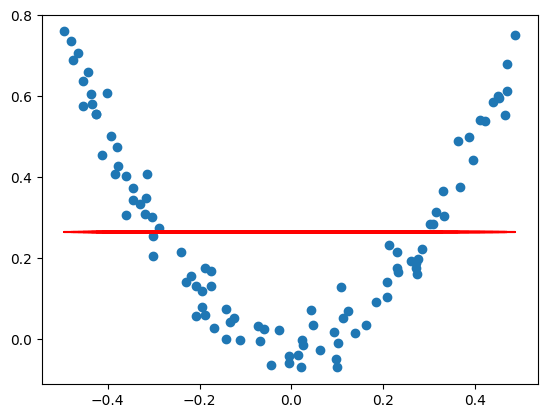

In [93]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1_mean'],color='red')

In [94]:
from sklearn.tree import DecisionTreeRegressor

In [95]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)

#### training m_1 model on X and df['res1'] column :

In [96]:
df.head(3)

X         y  pred1_mean      res1
0 -0.125460  0.051573    0.265458 -0.213885
1  0.450714  0.594480    0.265458  0.329021
2  0.231994  0.166052    0.265458 -0.099407

In [97]:
tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

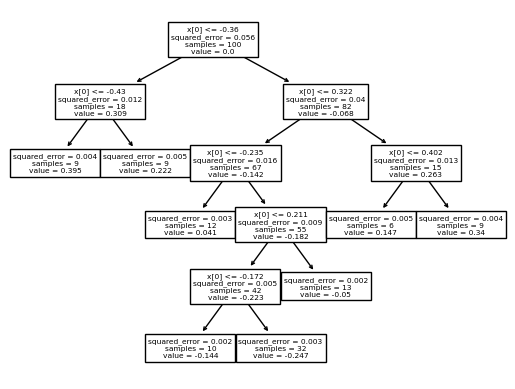

In [98]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [99]:
# generating X_test
X_test = np.linspace(-0.5, 0.5, 500)

#### y_pred1 = m_0 (mean) + result of m_1 model

In [101]:
df['pred1_mean'][0] 

0.26545839669679816

In [108]:
# pred1_mean = 0.265458

y_pred = 0.265458 + tree1.predict(X_test.reshape(500, 1))

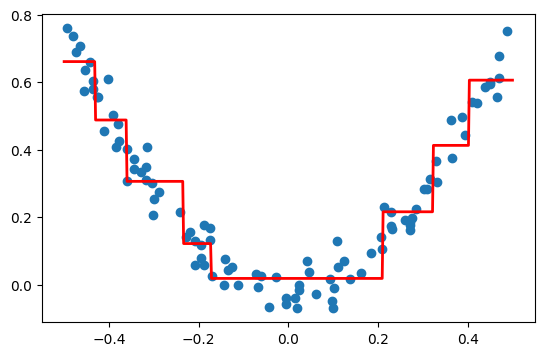

In [109]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

In [110]:
df['pred2'] = 0.265458 + tree1.predict(df['X'].values.reshape(100,1))

In [111]:
df

X         y  pred1_mean      res1     pred2
0  -0.125460  0.051573    0.265458 -0.213885  0.018319
1   0.450714  0.594480    0.265458  0.329021  0.605884
2   0.231994  0.166052    0.265458 -0.099407  0.215784
3   0.098658 -0.070178    0.265458 -0.335636  0.018319
4  -0.343981  0.343986    0.265458  0.078528  0.305964
..       ...       ...         ...       ...       ...
95 -0.006204 -0.040675    0.265458 -0.306133  0.018319
96  0.022733 -0.002305    0.265458 -0.267763  0.018319
97 -0.072459  0.032809    0.265458 -0.232650  0.018319
98 -0.474581  0.689516    0.265458  0.424057  0.660912
99 -0.392109  0.502607    0.265458  0.237148  0.487796

[100 rows x 5 columns]

In [39]:
df['res2'] = df['y'] - df['pred2']

In [40]:
df

X         y     pred1      res1     pred2      res2
0  -0.125460  0.051573  0.265458 -0.213885  0.018319  0.033254
1   0.450714  0.594480  0.265458  0.329021  0.605884 -0.011404
2   0.231994  0.166052  0.265458 -0.099407  0.215784 -0.049732
3   0.098658 -0.070178  0.265458 -0.335636  0.018319 -0.088497
4  -0.343981  0.343986  0.265458  0.078528  0.305964  0.038022
..       ...       ...       ...       ...       ...       ...
95 -0.006204 -0.040675  0.265458 -0.306133  0.018319 -0.058994
96  0.022733 -0.002305  0.265458 -0.267763  0.018319 -0.020624
97 -0.072459  0.032809  0.265458 -0.232650  0.018319  0.014489
98 -0.474581  0.689516  0.265458  0.424057  0.660912  0.028604
99 -0.392109  0.502607  0.265458  0.237148  0.487796  0.014810

[100 rows x 6 columns]

In [41]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [42]:
tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

#### y_pred2 = m_0 (mean) + (result of m_1 model + result of m_2 model)

In [43]:
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [tree1,tree2])

Text(0.5, 1.0, 'X vs y')

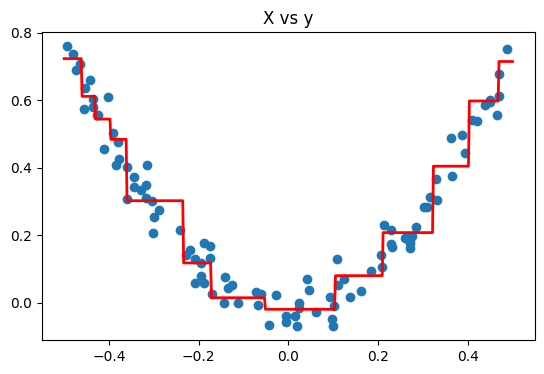

In [44]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

In [45]:
def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):

  if number == 0:
    return 
  else:
    # do gradient boosting

    if count > 1:
      y = y - regs[-1].predict(X)
    else:
      foo = y

    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(X, y)

    regs.append(tree_reg)

    x1 = np.linspace(-0.5, 0.5, 500)
    y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

    print(number)
    plt.figure()
    plt.plot(x1, y_pred, linewidth=2)
    plt.plot(X[:, 0], foo,"r.")
    plt.show()

    gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)


5


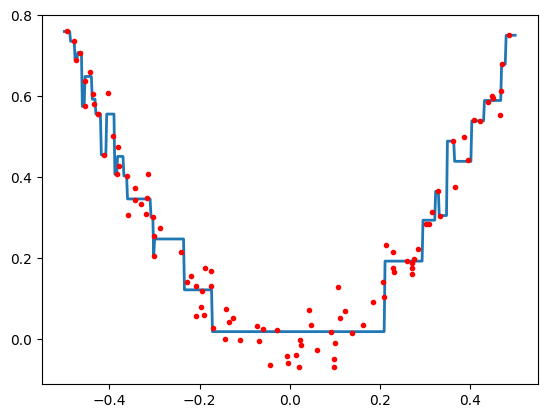

4


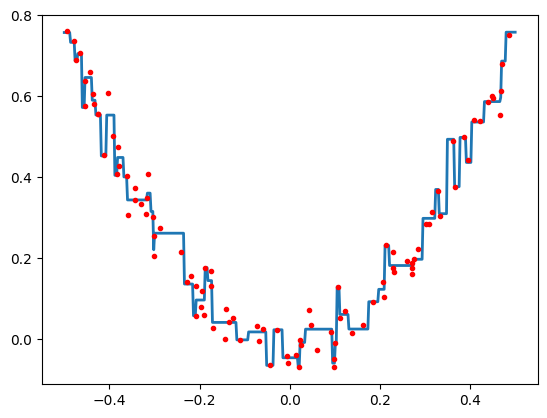

3


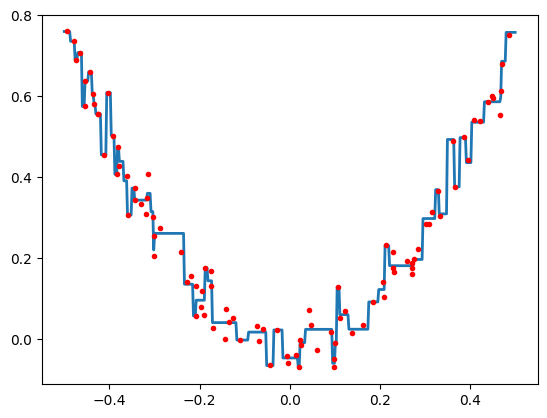

2


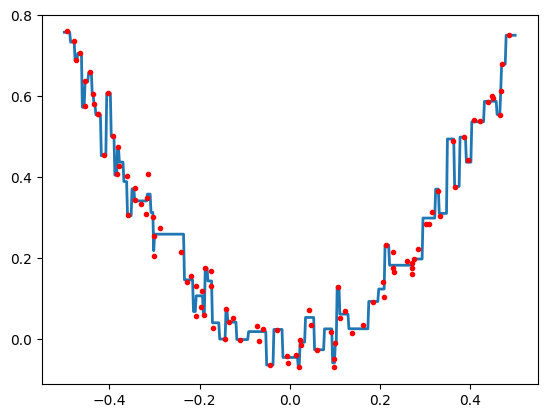

1


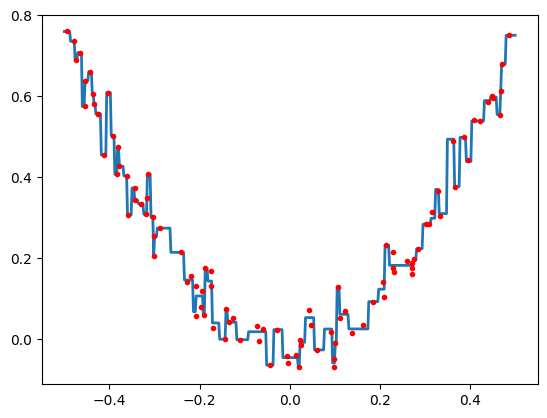

In [46]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)


gradient_boost(X,y,5,lr=1) # 5 decion trees

# Session 2 : Gradient Boosting Perspective | Regression

## 1. Parametric Space vs Function Space



1. **Parametric Space**: This refers to the space of the parameters of a model. For example, in a linear regression model with equation \(y = mx + b\), the parametric space is defined by the parameters \(m\) and \(b\). It is a space where each point represents a specific set of parameters for the model.



2. **Function Space**: This refers to the space of all possible functions that a model can represent. For instance, in the context of neural networks, the function space includes all the functions that can be produced by varying the network's parameters. Each point in the function space represents a different function (or mapping) from inputs to outputs.



### In summary:


- **Parametric Space**: Space of model parameters.


- **Function Space**: Space of all possible functions the model can represent.


- **Linear Regression is in Parametric Space as we know that the data must be linear for linear regression to function well and loss to be minimum.**


- **But for Gradient Boosting it is in function space as any function of any nature/type can be applied to it to find the minimum loss.**

## 2. Direction of Loss Minimization

- we move __opposite/negative to the slope__ to reach Minima in parametric space.


- due to $f_0(x)$ we reach to certain point in function space and after that by moving opposite to slope we reach the minima


- __So we differentiate the loss function in Function Space with respect to all the predictions.__


- The preidctions initially were generated due to __$f_0(x)$__.

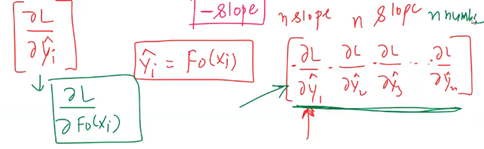

## 3. Update the Function (why we use weak learner for prediction): 

- we cannot use the __($m_{new} = m_{old} - \eta * \text{slope})\;$__ in case of new points in Gradient Boosting as $m_{new} = m_{old}$ in this case which will lead to massive overfitting.


- we cannot do $f_1(x) = f_0 (x_i) + y_i -f_0 (x_i)$  as $\;\;f_1(x)$ will be equal to $y_i$


- so we will train $x_i$ and the $y_i - f_0 (x_i)$ (residual) on weak decion tree to get bad results and this bad result hence decreases the loss slowly. we will hence get the $f_1 \neq f_0$


- __But the result of weak learner will be in the right direction and slowly with further iterations we will reach to right results__

## 4. Iterate

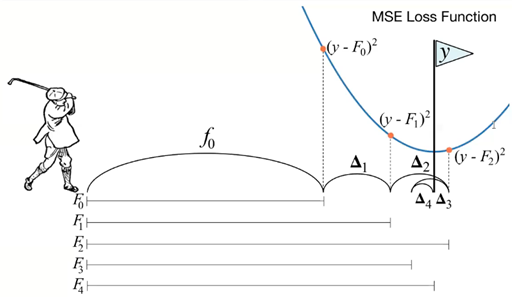

## Difference between Gradient Boosting and Gradient Descent

#### 1. Gradient Descent works in Parameter Space, Gradient Boosting works in Function Space.



#### 2. Difference in Update rule for new results:


- Gradient Descent's update rule says : $m_{new} = m_{old} - \eta\;*\;\text{slope}$<br></br>


- But Gradient Boosting update rule says : $f_m(x) = f_{m-1}(x) + \eta * h_m (x)$<br></br>
    - where $h_m(x)$ is weak decision tree.

## Advantages of Gradient Boosting

1. We can use any Differential Loss function but it will give similar results. eg : log loss, mse, mae etc



2. Works well both on classification and regression problems.



3. For weak models, we can use models other than decision tree too.



## Working of GB regression model with detailed Steps with Example

#### Step 1: Initialize the Model

Start with the initial prediction, which is the mean of the target values:


- Start with an initial prediction, typically the mean of the target values for regression tasks.


$$F_0(x) = \bar{y} = \frac{1}{n} \sum_{i=1}^n y_i$$

#### Step 2: Compute the Residuals

- For each data point, calculate the residual, which is the difference between the actual target value and the current prediction of the model.


For each data point $(x_i, y_i)$, compute the residuals at iteration $m$:

$$r_i^{(m)} = y_i - F_{m-1}(x_i)$$

These residuals represent the errors of the current model.

#### Step 3: Fit a Weak Learner


Train a weak learner (e.g., a shallow decision tree) to predict these residuals:

$$h_m(x) = \text{fit weak learner on residuals } \{ r_i^{(m)} \}$$

The weak learner tries to capture the remaining patterns in the residuals that the current model has not yet learned.

#### Step 4: Update the Model

Update the model by adding the scaled predictions of the weak learner:

$$F_m(x) = F_{m-1}(x) + \eta \cdot h_m(x)$$

Here, $\eta$ is the learning rate, a hyperparameter that controls the contribution of each weak learner. A smaller $\eta$ means that more iterations are needed, but it can help in preventing overfitting.

#### Step 5: Iterate

Repeat steps 2-4 for a predetermined number of iterations or until the model‚Äôs performance stops improving. Each new weak learner focuses on the errors (residuals) of the combined model so far.

### Example Walkthrough

Let's illustrate with a simple numerical example:

1. **Initial Model**: Suppose the target values are $y = [3, 1, 4, 2, 5]$.
   - The initial prediction for all data points is the mean of $y$:

   $$F_0(x) = \bar{y} = \frac{3 + 1 + 4 + 2 + 5}{5} = 3$$



2. **Residuals**: Calculate the residuals for each data point:

   $$r_i^{(1)} = y_i - F_0(x_i) = [3 - 3, 1 - 3, 4 - 3, 2 - 3, 5 - 3] = [0, -2, 1, -1, 2]$$



3. **Fit Weak Learner**: Train a decision tree on these residuals (this tree might be a simple stump for illustration):

   - Suppose the tree splits the residuals into groups with mean predictions of $-1$ and $1$.

   $$h_1(x) = \text{fit decision tree on } [-2, -1, 0, 1, 2]$$



4. **Update Model**: Update the model with the predictions of the decision tree scaled by the learning rate $\eta$:

   $$F_1(x) = F_0(x) + \eta \cdot h_1(x)$$

   Assuming $\eta = 0.1$:

   $$F_1(x) = 3 + 0.1 \cdot h_1(x)$$



5. **Next Iteration**: Calculate the new residuals based on $F_1(x)$ and fit another decision tree. Continue this process iteratively:

   - New residuals $r_i^{(2)}$ based on the updated model $F_1(x)$.
   
   - Train a new decision tree on these residuals.
   
   - Update the model again: $F_2(x) = F_1(x) + \eta \cdot h_2(x)$.

By iteratively fitting new models to the residuals, gradient boosting sequentially reduces the error and improves the predictive performance of the ensemble.

# Session 3 : Gradient Boosting Regression Maths Formulation

https://youtu.be/nMNiTZm-qY0

## It is same what is done in session 1 of GB regression

# Session 4 : Gradient Boosting for Classification Part 1

https://campusx.learnyst.com/learn/home/DSMP-2-0/section/503204/lesson/3118378

In Regression we take MSE as Loss function, but for Classification we will take **Log Loss** as Loss function.

### 3 stages will be here:
1. Output of Model 1 $(f_0 x)$ which will be log of odds


2. Output of Model 1 + Output of Model 2(decision tree)


3. Output of Model 1 + Output of Model 2(1st decision tree) + Output of Model 3(2nd decision tree)

### NOTE : for output of decision trees we use log of odds but for final prediction we convert log of odds to probabilities

### Model 1 :

1. __Here we will create 3 classification models : 1 simple model and other 2 Decision trees__
<br></br>


2. __we will use log of odds here instead of mean of output column as output of 1st simple model__

$$f_0 (x) \Longrightarrow\;\;\text{log of odds} = log\;\Big(\frac{\text{number of 1's}}{\text{number of 0's}}\Big)$$
<br></br>

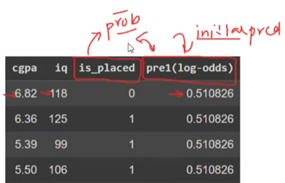

3. __we cannot directly calculate residual here hence we will convert log of odds to probability (pre1 (probability))__

$$p = \frac{1}{1 + e^{-\text{log odds}}}$$

___Note: If the probability of 1's occuring is greater than 0.5 then, prediction of all the row's pred1 will be 1 else 0___
<br></br>

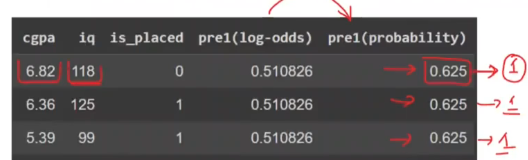

4. __we will calulcate pseudo residual :__ 

$$\text{residual1 (res1) = real output (is_placed) - probability value of each log of odds (pre1(probability) step 3 values)}$$

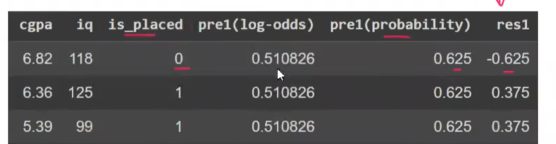

### Model 2 (Weak Decion tree): output of model 1+ output of model 2

1. __We will train a Weak Decision Tree :__ input columns will be initial input columns but y_train will be res1
#### NOTE : even though it is a classification problem, we will use weak regression tree


2. **For prediction of Model 2 we need to add :** 
#### <center> output of 1st model $f_0$ $\;\Longrightarrow\;$pre1(log-odds)</center>

### <center>+</center>

#### <center>**residual from 1st model**</center>



but as the  residual1 is  difference of probabilities, so we cannot add it with log of odds of 1st model. so we will convert the probability results in log of odds.

#### For every leaf node's result is in probabilities. so we will convert the values of leaf nodes to log-odds:


### <center>$$\text{Log of odds of a leaf node} = $$

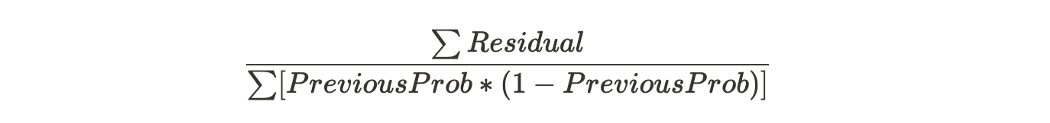

where,

- numerator is __sum of all residuals in that particular leaf.__


- Denominator is Previously Predicted Probabilities of each residual (pre1) * (1 - Previously Predicted Probabilities of each residual)

3. __leaf_entry1 : we will count how many values are falling in each leaf nodes i.e samples__

Here 2 rows are falling in leaf node 3

##### eg : row 0 and 7 falling in same leaf node entry number 3:

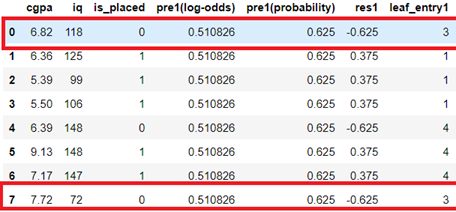

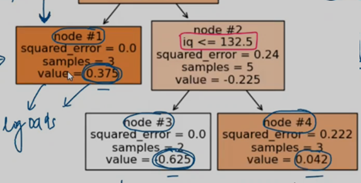

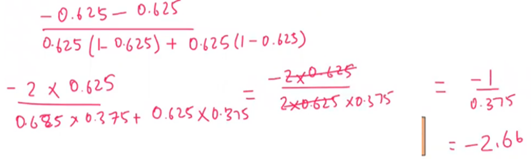

#### Similarly we will calculate log of odds for each leaf node

4. __Calculate Log of odds for each row of model2:__

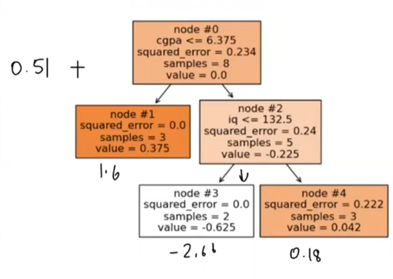

- for first row, __log of odds = output of model1 + log of odds of its leaf node $\Longrightarrow$ 0.51 + (-2.66) = -2.159__



- for second row, __log of odds = output of model1 + log of odds of its leaf node $\Longrightarrow$ 0.51 + 1.6 = 2.110__


- for fourth row, __log of odds = output of model1 + log of odds of its leaf node $\Longrightarrow$ 0.51 + 0.18 = 0.690__

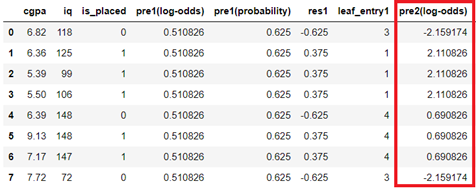

5. __Converting the log of odds pre2 result from step 4 into probabilities using the formula.__


$$p = \frac{1}{1 + e^{-\text{log odds}}}$$

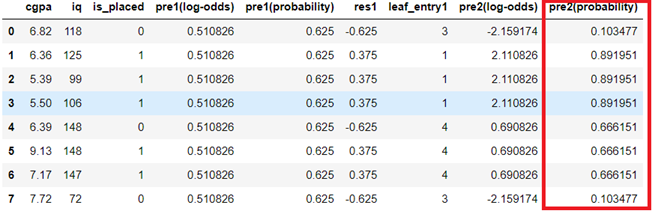

6. __Calculate the residual now (convert log of odds to probability) : is_placed -  pre2(probability)__

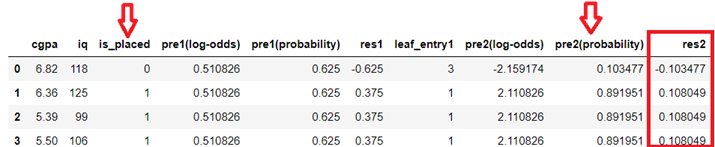

### NOTE : to reduce the jump from res1 to res2 we can multiply learning rate $\eta$ * pre2(log of odds)

### Model 3 (Weak dt 2) :

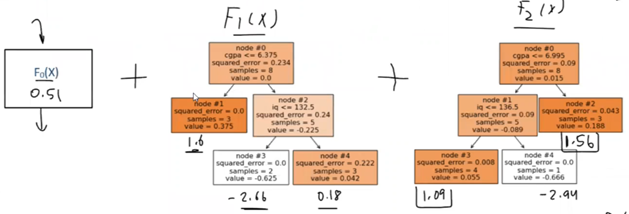

1. __For this model input columns = cgpa, iq and y(ouput column) = res2__ 
 - we take res2 as it is combined residual from model 1 + model 2

2. __leaf_entry1 : we will count how many values are falling in each leaf nodes i.e samples__

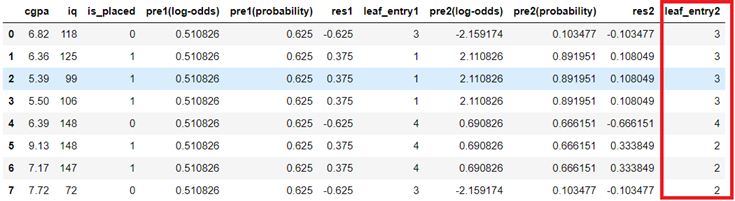


Here 4 rows are falling in leaf node 3

3 rows have fallen in leaf node 2 


1 rows has fallen in leaf node 4

3. __Calculating log of odds for each leaf node :__ Taking leaf node 4 here as example

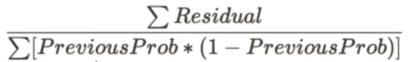

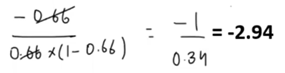

- previous probability here will be pre2(probability)

#### similary calculate logg of odds for each leaf node : 

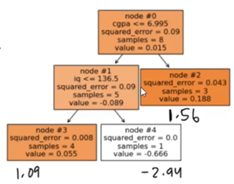

#### 4. Calculate Log of odds for each row of model3 :

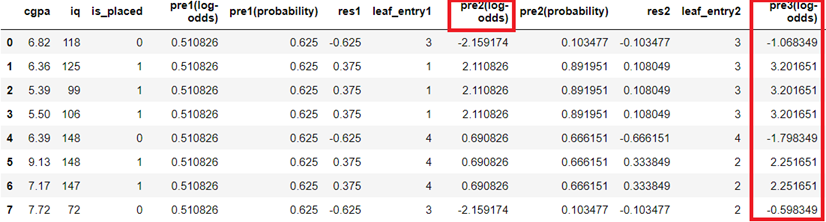

- for 0th row, __log of odds = [output of model1 + model2] pre2(log of odds)  + log of odds of its leaf node $\Longrightarrow$ -2.159 + 1.09 = -1.068__



- for 1st row, __log of odds = [output of model1 + model2] pre2(log of odds)  + log of odds of its leaf node $\Longrightarrow$ 2.110 + 1.09 = 3.201__


- for 4th row, __log of odds = [output of model1 + model2] pre2(log of odds)  +  log of odds of its leaf node $\Longrightarrow$ 0.6908 + (-2.94) = -1.798__

#### 5. Converting all log of odds (pre3) into probabilities using the formula :

$$p = \frac{1}{1 + e^{-\text{log odds}}}$$

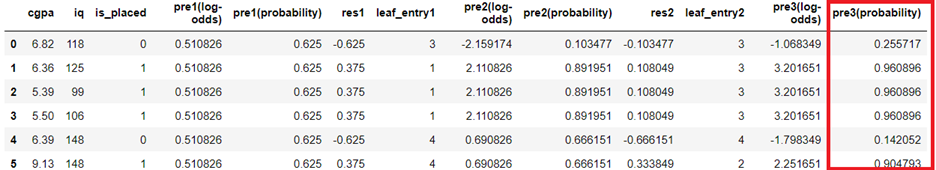

### 6. Prediction : Combine all 3 model and calculate output i.e log of odds :

### NOTE: for final output of all mdoel combined : if pre3 > 0.5 then output is 1. else output  = 0

#### 6. caluclating the final residual

$$\text{is_placed - pre3(probability)}$$


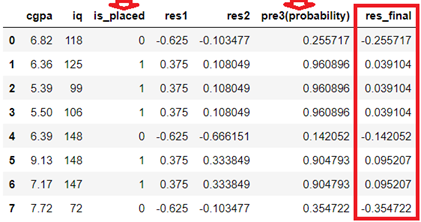

#### Conclusion : residual is shifting toward 0

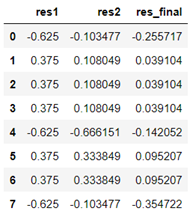

__Gradually we will see the residuals reaching 0__

## Gradient Bossting classification code : 

In [12]:
import pandas as pd
import numpy as np
import random

df = pd.DataFrame(
                  [
                      [6.82, 118, 0],
                      [6.36, 125, 1],
                      [5.39, 99, 1],
                      [5.50, 106, 1],
                      [6.39, 148, 0],
                      [9.13, 148, 1],
                      [7.17, 147, 1],
                      [7.72, 72, 0]
                   ], columns = ['cgpa',	'iq',	'is_placed']
)

df

cgpa   iq  is_placed
0  6.82  118          0
1  6.36  125          1
2  5.39   99          1
3  5.50  106          1
4  6.39  148          0
5  9.13  148          1
6  7.17  147          1
7  7.72   72          0

#### created initial prediction using log of odds : 

In [13]:
# initial prediction

df['pre1(log-odds)'] = np.log(5/3) # log base is e here not 10
df

cgpa   iq  is_placed  pre1(log-odds)
0  6.82  118          0        0.510826
1  6.36  125          1        0.510826
2  5.39   99          1        0.510826
3  5.50  106          1        0.510826
4  6.39  148          0        0.510826
5  9.13  148          1        0.510826
6  7.17  147          1        0.510826
7  7.72   72          0        0.510826

#### Through log of odds we will calculate probability (p)

In [14]:
# convert log odds to probability
df['pre1(probability)'] = 1/(1+np.exp(-np.log(5/3)))
df

cgpa   iq  is_placed  pre1(log-odds)  pre1(probability)
0  6.82  118          0        0.510826              0.625
1  6.36  125          1        0.510826              0.625
2  5.39   99          1        0.510826              0.625
3  5.50  106          1        0.510826              0.625
4  6.39  148          0        0.510826              0.625
5  9.13  148          1        0.510826              0.625
6  7.17  147          1        0.510826              0.625
7  7.72   72          0        0.510826              0.625

#### residual = real output - probability value of each log of odds (pre1 probability)

In [15]:
# calculating residual for stage 1
df['res1'] = df['is_placed'] - df['pre1(probability)']
df

cgpa   iq  is_placed  pre1(log-odds)  pre1(probability)   res1
0  6.82  118          0        0.510826              0.625 -0.625
1  6.36  125          1        0.510826              0.625  0.375
2  5.39   99          1        0.510826              0.625  0.375
3  5.50  106          1        0.510826              0.625  0.375
4  6.39  148          0        0.510826              0.625 -0.625
5  9.13  148          1        0.510826              0.625  0.375
6  7.17  147          1        0.510826              0.625  0.375
7  7.72   72          0        0.510826              0.625 -0.625

#### training first decion tree on cgpa, iq and res1 (weak regression tree):

In [16]:
# training the first decision tree
from sklearn.tree import DecisionTreeRegressor

reg1 = DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

reg1.fit(df.iloc[:,0:2].values, df.iloc[:,-1].values)

DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

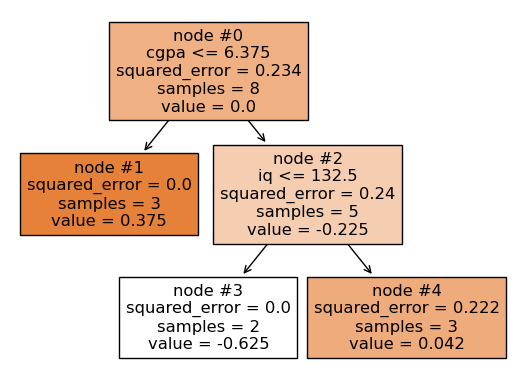

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plot_tree(reg1, feature_names=['cgpa','iq'],filled=True, node_ids=True)
plt.show()

#### calculate which point has fallen under which leaf node:

In [18]:
df['leaf_entry1'] = reg1.apply(df.iloc[:,0:2])
df

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


cgpa   iq  is_placed  pre1(log-odds)  pre1(probability)   res1  leaf_entry1
0  6.82  118          0        0.510826              0.625 -0.625            3
1  6.36  125          1        0.510826              0.625  0.375            1
2  5.39   99          1        0.510826              0.625  0.375            1
3  5.50  106          1        0.510826              0.625  0.375            1
4  6.39  148          0        0.510826              0.625 -0.625            4
5  9.13  148          1        0.510826              0.625  0.375            4
6  7.17  147          1        0.510826              0.625  0.375            4
7  7.72   72          0        0.510826              0.625 -0.625            3

#### add log of odd of 1st model + the result of log of odds of second model under the formula :

In [19]:
def return_logs(leaf):
  temp_df = df[df['leaf_entry1'] == leaf]
  num = temp_df['res1'].sum()

  den = sum(temp_df['pre1(probability)'] * (1 - temp_df['pre1(probability)']))
  return round(num/den,2)

In [20]:
df['pre2(log-odds)'] = df['pre1(log-odds)'] + df['leaf_entry1'].apply(return_logs)

#### calculating the probabilities from pre2(log-odds)

In [21]:
df['pre2(probability)'] = 1/(1+np.exp(-df['pre2(log-odds)']))
df

cgpa   iq  is_placed  pre1(log-odds)  pre1(probability)   res1  \
0  6.82  118          0        0.510826              0.625 -0.625   
1  6.36  125          1        0.510826              0.625  0.375   
2  5.39   99          1        0.510826              0.625  0.375   
3  5.50  106          1        0.510826              0.625  0.375   
4  6.39  148          0        0.510826              0.625 -0.625   
5  9.13  148          1        0.510826              0.625  0.375   
6  7.17  147          1        0.510826              0.625  0.375   
7  7.72   72          0        0.510826              0.625 -0.625   

   leaf_entry1  pre2(log-odds)  pre2(probability)  
0            3       -2.159174           0.103477  
1            1        2.110826           0.891951  
2            1        2.110826           0.891951  
3            1        2.110826           0.891951  
4            4        0.690826           0.666151  
5            4        0.690826           0.666151  
6            4        0.690826           0.666151  
7            3       -2.159174           0.103477

#### calculating residual : main output - (pre2 probability)

In [22]:
df['res2'] = df['is_placed'] - df['pre2(probability)']
df

cgpa   iq  is_placed  pre1(log-odds)  pre1(probability)   res1  \
0  6.82  118          0        0.510826              0.625 -0.625   
1  6.36  125          1        0.510826              0.625  0.375   
2  5.39   99          1        0.510826              0.625  0.375   
3  5.50  106          1        0.510826              0.625  0.375   
4  6.39  148          0        0.510826              0.625 -0.625   
5  9.13  148          1        0.510826              0.625  0.375   
6  7.17  147          1        0.510826              0.625  0.375   
7  7.72   72          0        0.510826              0.625 -0.625   

   leaf_entry1  pre2(log-odds)  pre2(probability)      res2  
0            3       -2.159174           0.103477 -0.103477  
1            1        2.110826           0.891951  0.108049  
2            1        2.110826           0.891951  0.108049  
3            1        2.110826           0.891951  0.108049  
4            4        0.690826           0.666151 -0.666151  
5            4        0.690826           0.666151  0.333849  
6            4        0.690826           0.666151  0.333849  
7            3       -2.159174           0.103477 -0.103477

In [23]:
reg2 = DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

reg2.fit(df.iloc[:,0:2].values, df.iloc[:,-1].values)

DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

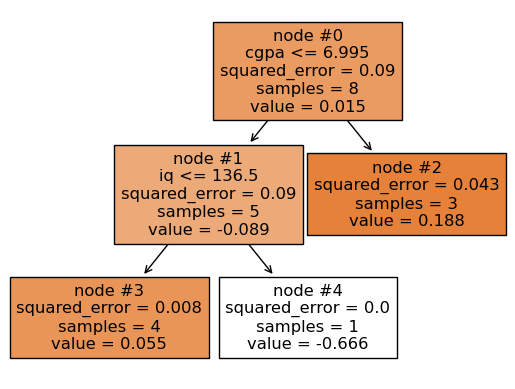

In [24]:
plot_tree(reg2, feature_names=['cgpa','iq'],filled=True, node_ids=True)
plt.show()

In [25]:
df['leaf_entry2'] = reg2.apply(df.iloc[:,0:2])
df

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


cgpa   iq  is_placed  pre1(log-odds)  pre1(probability)   res1  \
0  6.82  118          0        0.510826              0.625 -0.625   
1  6.36  125          1        0.510826              0.625  0.375   
2  5.39   99          1        0.510826              0.625  0.375   
3  5.50  106          1        0.510826              0.625  0.375   
4  6.39  148          0        0.510826              0.625 -0.625   
5  9.13  148          1        0.510826              0.625  0.375   
6  7.17  147          1        0.510826              0.625  0.375   
7  7.72   72          0        0.510826              0.625 -0.625   

   leaf_entry1  pre2(log-odds)  pre2(probability)      res2  leaf_entry2  
0            3       -2.159174           0.103477 -0.103477            3  
1            1        2.110826           0.891951  0.108049            3  
2            1        2.110826           0.891951  0.108049            3  
3            1        2.110826           0.891951  0.108049            3  
4            4        0.690826           0.666151 -0.666151            4  
5            4        0.690826           0.666151  0.333849            2  
6            4        0.690826           0.666151  0.333849            2  
7            3       -2.159174           0.103477 -0.103477            2

In [26]:
def return_logs(leaf):
  num = df[df['leaf_entry2'] == leaf]['res2'].sum()
  den = sum(df[df['leaf_entry2'] == leaf]['pre2(probability)'] * (1 - df[df['leaf_entry2'] == leaf]['pre2(probability)']))
  return round(num/den,2)

In [27]:
df['pre3(log-odds)'] = df['pre1(log-odds)'] + df['pre2(log-odds)'] + df['leaf_entry2'].apply(return_logs)

In [28]:
df['pre3(probability)'] = 1/(1+np.exp(-df['pre3(log-odds)']))
df

cgpa   iq  is_placed  pre1(log-odds)  pre1(probability)   res1  \
0  6.82  118          0        0.510826              0.625 -0.625   
1  6.36  125          1        0.510826              0.625  0.375   
2  5.39   99          1        0.510826              0.625  0.375   
3  5.50  106          1        0.510826              0.625  0.375   
4  6.39  148          0        0.510826              0.625 -0.625   
5  9.13  148          1        0.510826              0.625  0.375   
6  7.17  147          1        0.510826              0.625  0.375   
7  7.72   72          0        0.510826              0.625 -0.625   

   leaf_entry1  pre2(log-odds)  pre2(probability)      res2  leaf_entry2  \
0            3       -2.159174           0.103477 -0.103477            3   
1            1        2.110826           0.891951  0.108049            3   
2            1        2.110826           0.891951  0.108049            3   
3            1        2.110826           0.891951  0.108049            3   
4            4        0.690826           0.666151 -0.666151            4   
5            4        0.690826           0.666151  0.333849            2   
6            4        0.690826           0.666151  0.333849            2   
7            3       -2.159174           0.103477 -0.103477            2   

   pre3(log-odds)  pre3(probability)  
0       -1.068349           0.255717  
1        3.201651           0.960896  
2        3.201651           0.960896  
3        3.201651           0.960896  
4       -1.798349           0.142052  
5        2.251651           0.904793  
6        2.251651           0.904793  
7       -0.598349           0.354722

In [29]:
df['res_final'] = df['is_placed'] - df['pre3(probability)']

df[['res1','res2','res_final']]

res1      res2  res_final
0 -0.625 -0.103477  -0.255717
1  0.375  0.108049   0.039104
2  0.375  0.108049   0.039104
3  0.375  0.108049   0.039104
4 -0.625 -0.666151  -0.142052
5  0.375  0.333849   0.095207
6  0.375  0.333849   0.095207
7 -0.625 -0.103477  -0.354722

In [30]:
df[['cgpa', 'iq', 'is_placed','res1','res2','pre3(probability)','res_final']]

cgpa   iq  is_placed   res1      res2  pre3(probability)  res_final
0  6.82  118          0 -0.625 -0.103477           0.255717  -0.255717
1  6.36  125          1  0.375  0.108049           0.960896   0.039104
2  5.39   99          1  0.375  0.108049           0.960896   0.039104
3  5.50  106          1  0.375  0.108049           0.960896   0.039104
4  6.39  148          0 -0.625 -0.666151           0.142052  -0.142052
5  9.13  148          1  0.375  0.333849           0.904793   0.095207
6  7.17  147          1  0.375  0.333849           0.904793   0.095207
7  7.72   72          0 -0.625 -0.103477           0.354722  -0.354722

## Log(odds) Vs Probability

1. __Unconstrained Prediction Space :__ Log odds can span the entire real line (‚àí‚àû to +‚àû), while
probabilities are constrained between 0 and 1. Algorithms like gradient boosting involve
adding corrections (via the weak learners) to the predictions iteratively. If you're working in
the log odds space, there's no need to worry about your predictions going out of bounds.



2. __Better Gradients :__ When computing gradients (which guide the addition of new trees in
boosting), the gradients can be more informative and have better magnitudes in the log odds
space than in the probability space, especially when probabilities are near 0 or 1.

# Session 5 : Gradient Boosting Classification | Geometric Intuition

### Just watch the video. It is visual representation of the decision trees of Gradient Boosting.

https://towardsdatascience.com/all-you-need-to-know-about-gradient-boosting-algorithm-part-2-classification-d3ed8f56541e

NOTEBOOK : https://colab.research.google.com/drive/13p46IFhg3h6BIdjxUcfXPco13jIOCV6I?usp=sharing

# Session 6 : Gradient Boosting Classification | Maths Formula

Notebook : https://drive.google.com/file/d/1i6AsjCJtfilbhNxkG39kmQsJNRtuMwKq/view

### Log Loss Formula

The log loss (also known as logistic loss or cross-entropy loss) is a measure of the performance of a classification model. It is given by the formula:

$$ \text{Log Loss} = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right] $$

where:
- N is the number of samples,
- $y_i$ is the true label of the \(i\)-th sample (1 for positive class, 0 for negative class),
- $p_i$ is the predicted probability of the \(i\)-th sample belonging to the positive class.


### Log Loss Formula (in terms of Log of Odds)

The log loss, when expressed in terms of the log of odds, can be written as:

$$ \text{Log Loss} = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log \left( \frac{p_i}{1 - p_i} \right) + \log(1 - p_i) \right] $$

where:
- N is the number of samples,
- $y_i$ is the true label of the i-th sample (1 for positive class, 0 for negative class),
- $p_i$ is the predicted probability of the i-th sample belonging to the positive class,
- $\frac{p_i}{1 - p_i}$ is the odds ratio for the $i^{th}$ sample.

Note that this form leverages the relationship between probabilities and odds, where the odds ratio is the probability of the event occurring divided by the probability of the event not occurring.


## Log(odds) vs Probability

__Unconstrained Prediction Space :__ Log odds can span the entire real line (‚àí‚àû to +‚àû), while
probabilities are constrained between 0 and 1. Algorithms like gradient boosting involve
adding corrections (via the weak learners) to the predictions iteratively. If you're working in
the log odds space, there's no need to worry about your predictions going out of bounds.



__Better Gradients :__ When computing gradients (which guide the addition of new trees in
boosting), the gradients can be more informative and have better magnitudes in the log odds
space than in the probability space, especially when probabilities are near 0 or 1.

In **simple terms**, we deal with **log of odds** (also called the **logit**) instead of probability in gradient boosting (especially for classification) for **mathematical convenience** and **stability**. Here's a breakdown:

---

### üîç First: What are "odds" and "log of odds"?

* **Probability (`p`)**: Ranges between 0 and 1.
* **Odds**: `p / (1 - p)` ‚Üí Ranges from 0 to ‚àû.
* **Log of odds (logit)**: `log(p / (1 - p))` ‚Üí Ranges from ‚àí‚àû to +‚àû.

---

### ‚úÖ Why do we use **log of odds** in gradient boosting instead of probability?

#### 1. **Better range for modeling**

* Probabilities are bounded between 0 and 1 ‚Äî which makes it hard for regression-based models to predict directly.
* Log-odds are unbounded (from -‚àû to +‚àû), making it easier for the model to **fit a continuous function** like in regression trees.

#### 2. **Mathematical convenience in optimization**

* Gradient boosting relies on **gradients (derivatives)** of a loss function.
* For binary classification, we use **log loss**:

  $$
  \text{LogLoss} = -[y \cdot \log(p) + (1 - y) \cdot \log(1 - p)]
  $$
* When you compute the derivative of this loss function, it becomes much easier and **more stable** if you're optimizing with respect to the **log odds**, not the probability.

#### 3. **Natural link function (Logit)**

* In statistics, we often transform probabilities using the **logit function**, which converts probability to log-odds.
* This is called the **canonical link function** in generalized linear models (GLMs) for binary classification.
* It ensures the predicted values can be easily transformed back to valid probabilities using the **sigmoid function**:

  $$
  p = \frac{1}{1 + e^{-f(x)}}
  $$

  where $f(x)$ is the output (log odds) from the boosting model.

---

### üìå In summary:

| Concept              | Log of Odds                                                     |
| -------------------- | --------------------------------------------------------------- |
| Why used?            | Converts bounded probability (0‚Äì1) to unbounded scale (-‚àû to ‚àû) |
| Helps with?          | Gradient optimization, numerical stability                      |
| How to convert back? | Use sigmoid: $p = \frac{1}{1 + e^{-f(x)}}$                      |
| Is it intuitive?     | Not directly‚Äîbut essential for effective learning               |

---

### üß† Analogy:

Imagine trying to paint a wall where you're only allowed to move your brush between 0 and 1 meter. It's restrictive. But if you transform that wall into an infinite canvas (‚àí‚àû to +‚àû), you can move more freely and paint more accurately ‚Äî that's what log-odds allow models to do!



# Interview Questions

Here are some of the most probable interview questions related to Gradient Boosting for ML engineer or data scientist roles:

1. **Conceptual Questions**:
   - What is Gradient Boosting?
   - How does Gradient Boosting differ from other ensemble methods like Bagging and Random Forests?
   - Can you explain the intuition behind Gradient Boosting?

2. **Technical Details**:
   - How does Gradient Boosting work? Walk me through the algorithm.
   - What is the role of the learning rate in Gradient Boosting?
   - How do you choose the number of trees in a Gradient Boosting model?
   - What is the difference between Gradient Boosting and AdaBoost?
   - Explain the concept of residuals in the context of Gradient Boosting.

3. **Implementation and Tuning**:
   - How do you prevent overfitting in Gradient Boosting models?
   - What are some common hyperparameters in Gradient Boosting, and how do they impact the model?
   - How would you tune the hyperparameters of a Gradient Boosting model?
   - What is the significance of the maximum depth of trees in Gradient Boosting?
   - How do you handle missing values in Gradient Boosting?

4. **Advanced Topics**:
   - What are some common loss functions used in Gradient Boosting for regression and classification?
   - Explain the concept of early stopping in the context of Gradient Boosting.
   - What is XGBoost, and how does it improve upon traditional Gradient Boosting methods?
   - Can you discuss the differences between XGBoost, LightGBM, and CatBoost?
   - What are some of the techniques used to speed up the training process of Gradient Boosting models?

5. **Practical Application**:
   - How would you evaluate the performance of a Gradient Boosting model?
   - Describe a situation where you used Gradient Boosting to solve a real-world problem.
   - What are some common pitfalls when using Gradient Boosting, and how can they be avoided?
   - How do you handle class imbalance in Gradient Boosting?

6. **Troubleshooting**:
   - What would you do if your Gradient Boosting model is not performing well on the validation set?
   - How do you interpret the feature importance scores in Gradient Boosting?
   - What steps would you take if your Gradient Boosting model is taking too long to train?

Preparing for these questions will give you a strong foundation in understanding and working with Gradient Boosting models in a professional setting.